In [37]:
import os
import pandas as pd
import scipy
from scipy.stats import skew 
#
#for dirname, _, filenames in os.walk('./data'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

In [62]:
print(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [56]:
train_data_isnull = train_data.isnull()
#identify columns with null values
for dfcols in train_data_isnull:
    if len(train_data_isnull.loc[train_data_isnull[dfcols]==True])==0:
        continue
    print(dfcols)
    print("Null %: ", round(len(train_data_isnull.loc[train_data_isnull[dfcols]==True])/len(train_data_isnull)*100,3))
    print("Null count: ", len(train_data_isnull.loc[train_data_isnull[dfcols]==True]))

Age
Null %:  19.865
Null count:  177
Cabin
Null %:  77.104
Null count:  687
Embarked
Null %:  0.224
Null count:  2


         Fare  SurvivedSum  SurvivedCount  Survived Percentage
0      0.0000            1             15             6.666667
1      4.0125            0              1             0.000000
2      5.0000            0              1             0.000000
3      6.2375            0              1             0.000000
4      6.4375            0              1             0.000000
..        ...          ...            ...                  ...
243  227.5250            3              4            75.000000
244  247.5208            1              2            50.000000
245  262.3750            2              2           100.000000
246  263.0000            2              4            50.000000
247  512.3292            3              3           100.000000

[248 rows x 4 columns]
4.7792532923723545


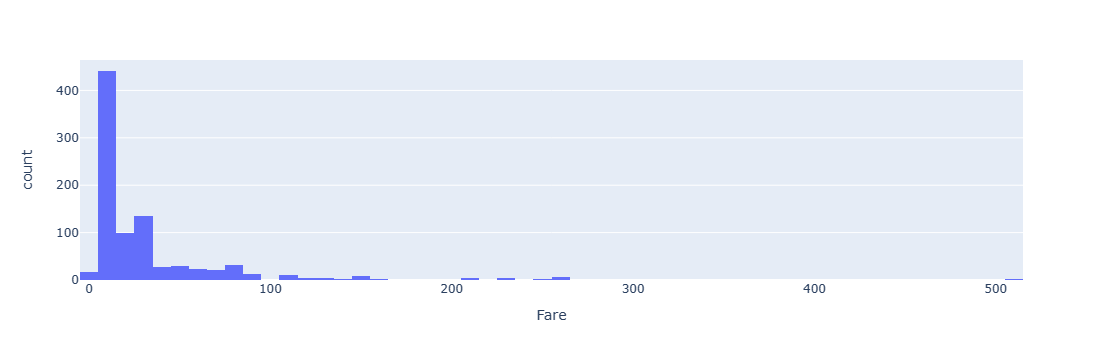

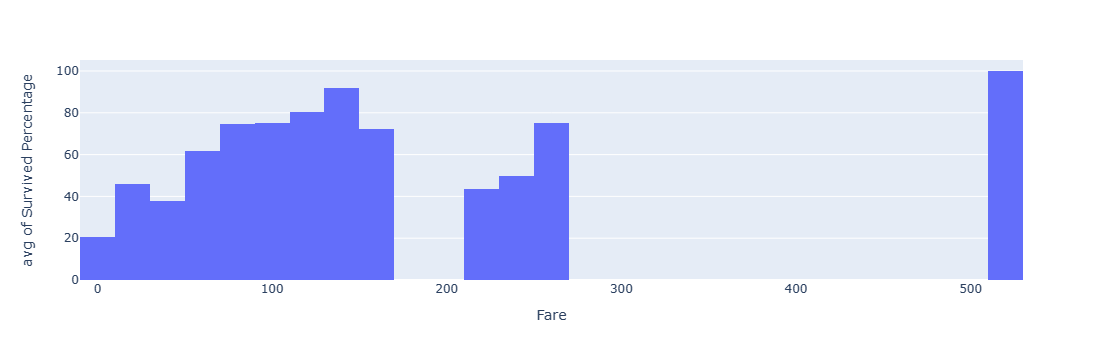

In [38]:
import plotly.express as px

fare_data = train_data[["PassengerId","Fare","Survived"]]
table1 = pd.pivot_table(fare_data, values='Survived', index=['Fare'], aggfunc="sum")
table2 = pd.pivot_table(fare_data, values='Survived', index=['Fare'], aggfunc="count")


jtable=table1.join(table2, on="Fare", lsuffix='Sum', rsuffix='Count')
jtable.reset_index(inplace=True)
jtable["Survived Percentage"]=jtable["SurvivedSum"]/jtable["SurvivedCount"]*100
print(jtable)

print(skew(train_data["Fare"], axis=0, bias=True))

fig1 = px.histogram(fare_data, x='Fare', y='PassengerId', histfunc='count')
fig1.show()

fig2 = px.histogram(jtable, x='Fare', y='Survived Percentage', histfunc='avg')
fig2.show()



In [20]:
women = train_data.loc[train_data['Sex']=='female']['Survived']
women_survival_rate = sum(women)/len(women)
print("% of women survived: ",women_survival_rate)

men = train_data.loc[train_data['Sex']=='male']['Survived']
men_survival_rate = sum(men)/len(men)
print("% of men survived: ",men_survival_rate)

% of women survived:  0.7420382165605095
% of men survived:  0.18890814558058924


In [28]:
from sklearn.ensemble import RandomForestClassifier
#define result
y = train_data["Survived"]
#define features to use for random forest
features = ["Pclass", "Sex", "SibSp", "Parch"]

#does something like one hot encoding but it may fail if unique values in train and test are not the same
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

#define model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#train model using train features and train result
model.fit(X, y)
#predict results using test features
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission-randomforest.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [32]:
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(random_state=0).fit(X, y)
LRpredictions = LRmodel.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': LRpredictions})
output.to_csv('submission-logisticregression.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
